# Preventing Credit Card Defaults - Part 1

In this activity, you will use Keras to build a neural network model that predicts whether a credit card customer will default on their debt. You will apply what you learned in the previous demonstration. But, instead of using a dataset that contains 2 features, you will build a neural network model from a dataset that contains 22 features and 1 target.

## Instructions:

1. Read the CSV file from the Resources folder into a Pandas DataFrame.

2. Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

3. Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

4. Create the training and testing sets using the `train_test_split` function from scikit-learn.

5. Scale the features data using the `StandardScaler` from sklearn.

6. Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

7. Display the model structure using the `summary` function.

## References:

[Keras Sequential model](https://keras.io/api/models/sequential/)

[Keras Dense module](https://keras.io/api/layers/core_layers/dense/)


In [2]:
# Imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

## Step 1:  Read the CSV file from the Resources folder into a Pandas DataFrame.

In [3]:
# Read the cc_default.csv file from the Resources folder into a Pandas DataFrame
cc_df = pd.read_csv(Path('./Resources/cc_default.csv'))

# Review the DataFrame
cc_df.head()


,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Step 2: Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

In [5]:
# Define features set X by selecting all columns but DEFAULT
X = cc_df.drop(columns='DEFAULT')

# Display the features DataFrame
X.head()


,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## Step 3: Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

In [6]:
# Define target set by selecting the DEFAULT column
y = cc_df['DEFAULT']

# Display a sample y
y.head()


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

## Step 4: Create the training and testing sets using the `train_test_split` function from scikit-learn.

In [9]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)


## Step 5: Scale the features data using the `StandardScaler` from sklearn.

In [10]:
# Create the StandardScaler instance
x_scaler = StandardScaler()


In [11]:
# Fit the scaler to the features training dataset
x_scaler.fit(x_train)


StandardScaler()

In [19]:
# Scale both the training and testing data from the features dataset
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)


## Step 6: Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

In [14]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [15]:
# Define the the number of inputs to the model
number_inputs = 22

# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, activation='ReLU', input_dim=number_inputs))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(units=1, activation='sigmoid'))


## Step 7: Display the model structure using the `summary` function.

In [16]:
# Display the Sequential model summary
neuron.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                276       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compile the model, binary crossentropy is for classification, adam is a good optimizer for large datasets, accuracy metric
# is used for classification
neuron.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#Fit the model
model=neuron.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
704/704 [==============================] - 1s 1ms/step - loss: 0.5052 - accuracy: 0.7976
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4587 - accuracy: 0.8129
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4508 - accuracy: 0.8157
Epoch 4/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4471 - accuracy: 0.8168
Epoch 5/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4449 - accuracy: 0.8180
Epoch 6/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4432 - accuracy: 0.8191
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4420 - accuracy: 0.8180
Epoch 8/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4411 - accuracy: 0.8191
Epoch 9/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4406 - accuracy: 0.8196
Epoch 10/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4399 - accura

704/704 [==============================] - 1s 1ms/step - loss: 0.4294 - accuracy: 0.8210
Epoch 82/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4292 - accuracy: 0.8213
Epoch 83/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8213
Epoch 84/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.8224
Epoch 85/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.8221
Epoch 86/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4295 - accuracy: 0.8221
Epoch 87/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4292 - accuracy: 0.8225
Epoch 88/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4287 - accuracy: 0.8219
Epoch 89/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4292 - accuracy: 0.8210
Epoch 90/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 

In [21]:
# while the model is fit the results of loss and accuracy are displayed each epoch. This is all stored in the model variable
# It is common to evaluate a neural network model after it is fitted and before using it to make predictions
# Next is accuracy evaluation of the model

In [22]:
# First we will plot the model to evaluate visually. To create the plots create a DataFrame using the history dictionary
# of the training results stored on the model variable. Because they are stored there we can access the dictionary with 
# model.history

<AxesSubplot:>

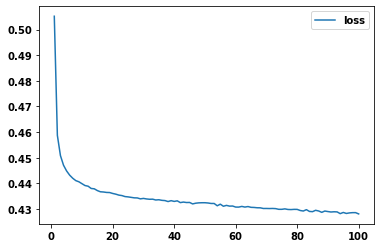

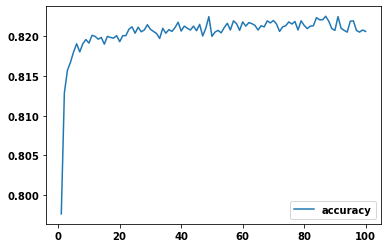

In [23]:
df = pd.DataFrame(model.history,index=range(1,len(model.history['loss'])+1))

#plot the loss
df.plot(y='loss')

#plot the accuracy
df.plot(y='accuracy')

In [24]:
# Now the model is trained and performance can be evaluated using test data similarly to machine learning in sklearn

In [26]:
model_loss,model_accuracy=neuron.evaluate(x_test_scaled,y_test,verbose=2)

print(f'Loss:{model_loss},Accuracy:{model_accuracy}')

235/235 - 0s - loss: 0.4422 - accuracy: 0.8156 - 304ms/epoch - 1ms/step
Loss:0.44215667247772217,Accuracy:0.8155999779701233
